# Librairies

## Install Package

     |████████████████████▉           | 40.4MB 981kB/s eta 0:00:23

In [2]:
import os
import json
import numpy as np
import pandas as pd
import keras
import gc
import os
import json
import logging
import datetime
import warnings
import seaborn as sns
import cv2
import random
import keras
from PIL import Image
from keras import layers
from keras.applications import DenseNet121
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline 
warnings.filterwarnings('ignore')

from glob import glob

Using TensorFlow backend.


# Data pre-processing

## Call API Kaggle and configuration Dataset


In [0]:
print(os.listdir(""))


## Load Data


In [0]:
df_train = pd.read_csv("test/test.csv")
df_train.head()

In [0]:
df_train = pd.read_csv("train/train.csv")
df_train.head()

category_id        date_captured                                 file_name  \
0           19  2011-05-13 23:43:18  5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg   
1           19  2012-03-17 03:48:44  588a679f-23d2-11e8-a6a3-ec086b02610b.jpg   
2            0  2014-05-11 11:56:46  59279ce3-23d2-11e8-a6a3-ec086b02610b.jpg   
3            0  2013-10-06 02:00:00  5a2af4ab-23d2-11e8-a6a3-ec086b02610b.jpg   
4            0  2011-07-12 13:11:16  599fbd89-23d2-11e8-a6a3-ec086b02610b.jpg   

   frame_num                                    id  location  rights_holder  \
0          1  5998cfa4-23d2-11e8-a6a3-ec086b02610b        33   Justin Brown   
1          2  588a679f-23d2-11e8-a6a3-ec086b02610b       115   Justin Brown   
2          1  59279ce3-23d2-11e8-a6a3-ec086b02610b        96  Erin Boydston   
3          1  5a2af4ab-23d2-11e8-a6a3-ec086b02610b        57  Erin Boydston   
4          3  599fbd89-23d2-11e8-a6a3-ec086b02610b        46   Justin Brown   

                                 seq_id  seq_num_frames  width  height  
0  6f084ccc-5567-11e8-bc84-dca9047ef277               3   1024     747  
1  6f12067d-5567-11e8-b3c0-dca9047ef277               3   1024     747  
2  6faa92d1-5567-11e8-b1ae-dca9047ef277               1   1024     747  
3  6f7d4702-5567-11e8-9e03-dca9047ef277               1   1024     747  
4  6f1728a1-5567-11e8-9be7-dca9047ef277               3   1024     747

In [0]:
train_df = pd.read_csv('train/train.csv')
test_df = pd.read_csv('test/test.csv')

In [0]:
test_df.head()

date_captured                                 file_name  frame_num  \
0  2016-01-03 11:30:56  bce932f6-2bf6-11e9-bcad-06f10d5896c4.jpg          1   
1  2016-01-03 11:30:57  bce932f7-2bf6-11e9-bcad-06f10d5896c4.jpg          2   
2  2016-01-03 11:30:58  bce932f8-2bf6-11e9-bcad-06f10d5896c4.jpg          3   
3  2016-01-03 11:30:59  bce932f9-2bf6-11e9-bcad-06f10d5896c4.jpg          4   
4  2016-01-03 11:31:00  bce932fa-2bf6-11e9-bcad-06f10d5896c4.jpg          5   

                                     id  location  \
0  bce932f6-2bf6-11e9-bcad-06f10d5896c4        37   
1  bce932f7-2bf6-11e9-bcad-06f10d5896c4        37   
2  bce932f8-2bf6-11e9-bcad-06f10d5896c4        37   
3  bce932f9-2bf6-11e9-bcad-06f10d5896c4        37   
4  bce932fa-2bf6-11e9-bcad-06f10d5896c4        37   

                       rights_holder                                seq_id  \
0  Idaho Department of Fish and Game  6e9ac61c-2e32-11e9-90ef-dca9047ef277   
1  Idaho Department of Fish and Game  6e9ac61c-2e32-11e9-90ef-dca9047ef277   
2  Idaho Department of Fish and Game  6e9ac61c-2e32-11e9-90ef-dca9047ef277   
3  Idaho Department of Fish and Game  6e9ac61c-2e32-11e9-90ef-dca9047ef277   
4  Idaho Department of Fish and Game  6e9ac61c-2e32-11e9-90ef-dca9047ef277   

   seq_num_frames  width  height  
0               5   1024     726  
1               5   1024     726  
2               5   1024     726  
3               5   1024     726  
4               5   1024     726

In [0]:
print("Train and test shape: {} {}".format(train_df.shape, test_df.shape))

Train and test shape: (196299, 11) (153730, 10)


## Data exploration

In [0]:
# Let's define the classes:
classes_wild = {0: 'empty', 1: 'deer', 2: 'moose', 3: 'squirrel', 4: 'rodent', 5: 'small_mammal', \
                6: 'elk', 7: 'pronghorn_antelope', 8: 'rabbit', 9: 'bighorn_sheep', 10: 'fox', 11: 'coyote', \
                12: 'black_bear', 13: 'raccoon', 14: 'skunk', 15: 'wolf', 16: 'bobcat', 17: 'cat',\
                18: 'dog', 19: 'opossum', 20: 'bison', 21: 'mountain_goat', 22: 'mountain_lion'}

In [0]:
train_df['classes_wild'] = train_df['category_id'].apply(lambda cw: classes_wild[cw])

### Check images

In [0]:
train_image_files = list('train_images')
test_image_files = list('test_images')
                         
print("Number of image files: train:{} test:{}".format(len(train_image_files), len(test_image_files)))

Number of image files: train:12 test:11


In [0]:
%%time
train_file_names = list(train_df['file_name'])
print("Matching train image names: {}".format(len(set(train_file_names).intersection(train_image_files))))

Matching train image names: 0
CPU times: user 48.2 ms, sys: 3.86 ms, total: 52.1 ms
Wall time: 57.1 ms


In [0]:
%%time
test_file_names = list(test_df['file_name'])
print("Matching test image names: {}".format(len(set(test_file_names).intersection(test_image_files))))

Matching test image names: 0
CPU times: user 31.8 ms, sys: 1 ms, total: 32.8 ms
Wall time: 32.7 ms


### Clases of images

In [0]:
cnt_classes_images = train_df.classes_wild.nunique()
print("There are {} classes of images".format(cnt_classes_images))
pd.DataFrame(train_df.classes_wild.value_counts()).transpose()

There are 14 classes of images


empty  opossum  raccoon  coyote  rabbit  deer  bobcat   cat  \
classes_wild  131457    14106     8623    7209    6938  6102    5975  4759   

              squirrel   dog  rodent  skunk   fox  mountain_lion  
classes_wild      3398  3035    2210   1361  1093             33

### Number of sequences frames

In [0]:
def plot_classes(feature, fs=8, show_percents=True, color_palette='Set3'):
    f, ax = plt.subplots(1,1, figsize=(2*fs,4))
    total = float(len(train_df))
    g = sns.countplot(train_df[feature], order = train_df[feature].value_counts().index, palette=color_palette)
    g.set_title("Number and percentage of labels for each class of {}".format(feature))
    if(show_percents):
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}%'.format(100*height/total),
                    ha="center") 
    plt.show()    

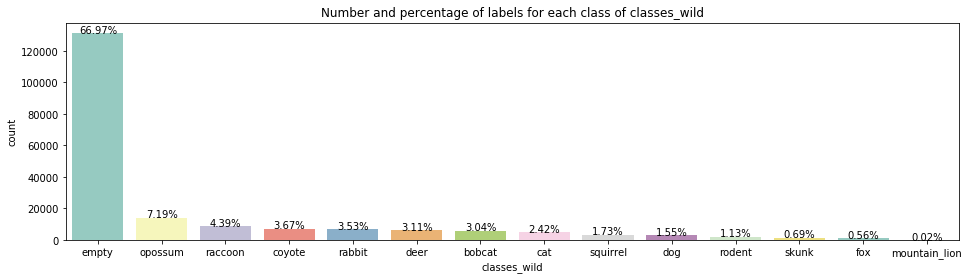

In [0]:
plot_classes('classes_wild')

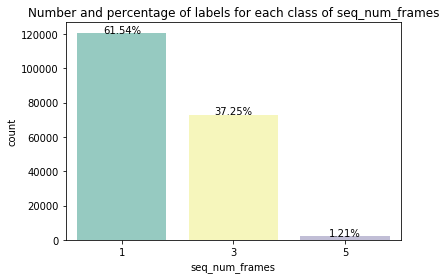

In [0]:
plot_classes('seq_num_frames', fs=3)

### Locations distribution

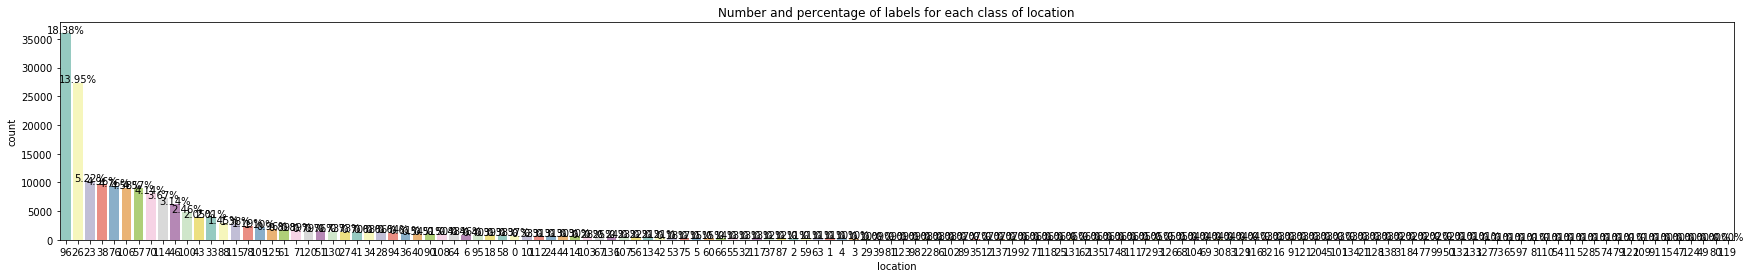

In [0]:
plot_classes('location', fs=15)

### Locations and classes

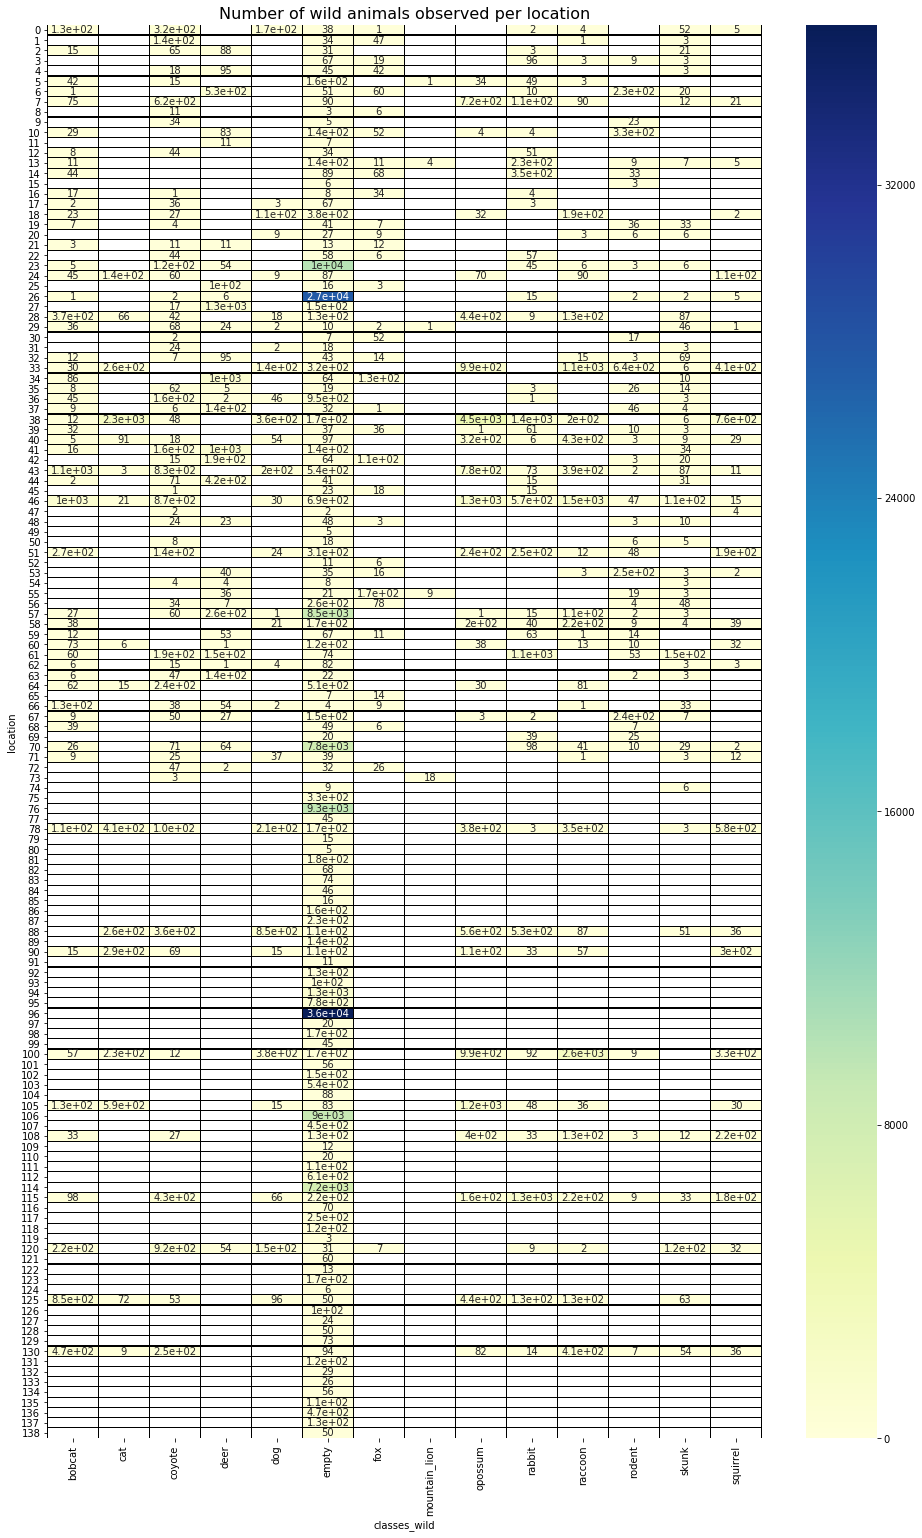

In [0]:
fig, ax = plt.subplots(1,1,figsize=(16,26))
t = pd.DataFrame(train_df.groupby(['classes_wild', 'location'])['seq_id'].count().reset_index())
m = t.pivot(index='location', columns='classes_wild', values='seq_id')
s = sns.heatmap(m, linewidths=.1, linecolor='black', annot=True, cmap="YlGnBu")
s.set_title('Number of wild animals observed per location', size=16)
plt.show()

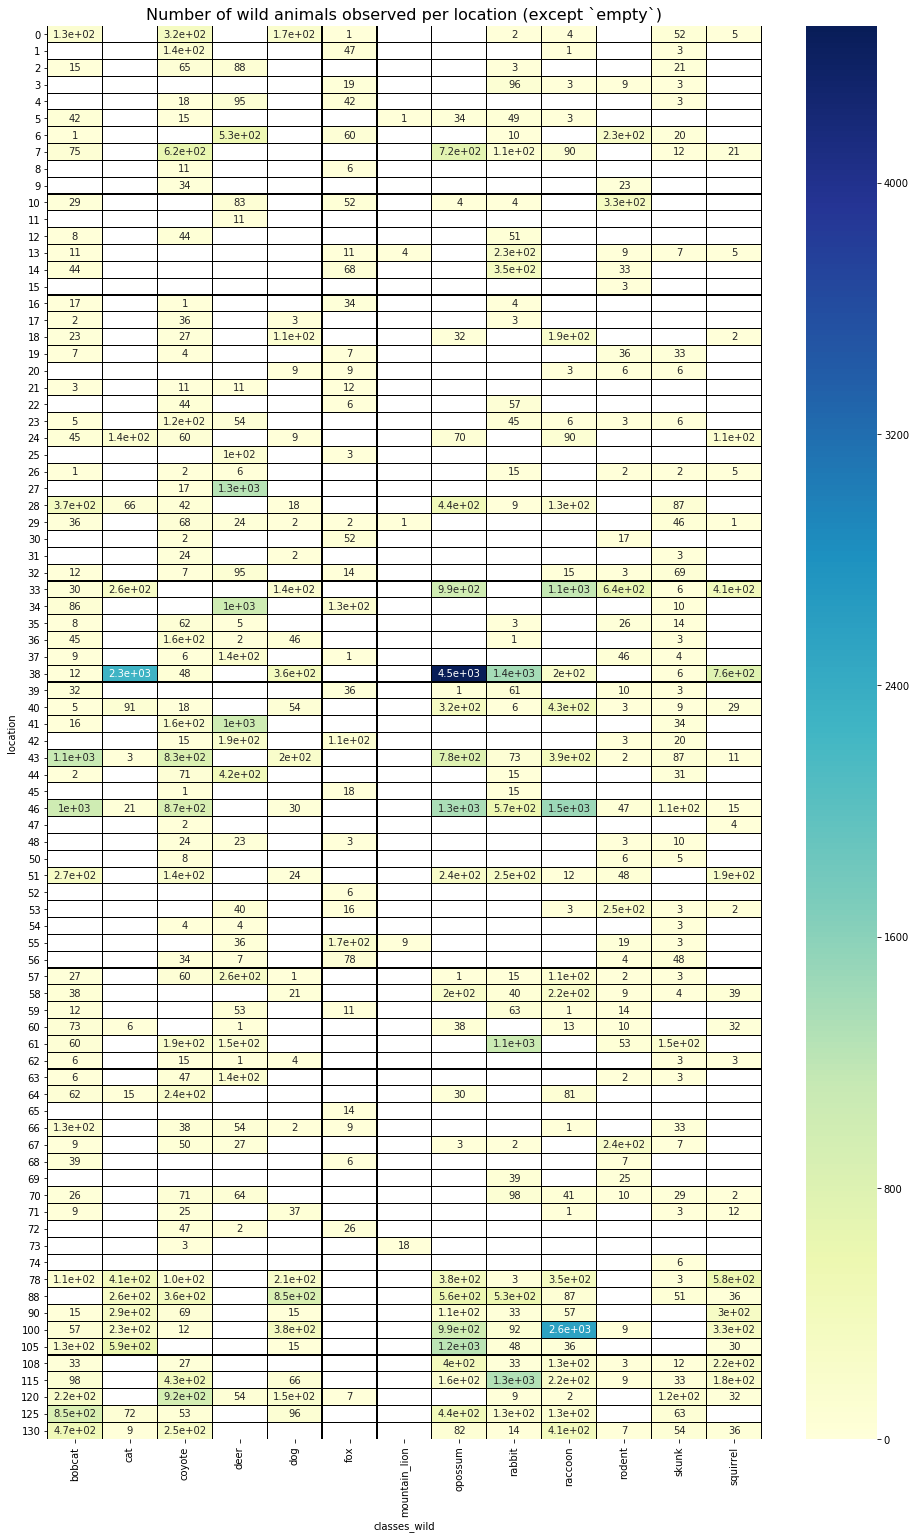

52992

In [0]:
fig, ax = plt.subplots(1,1,figsize=(16,26))
tmp = train_df[train_df['classes_wild'] != 'empty']
t = pd.DataFrame(tmp.groupby(['classes_wild', 'location'])['seq_id'].count().reset_index())
m = t.pivot(index='location', columns='classes_wild', values='seq_id')
s = sns.heatmap(m, linewidths=.1, linecolor='black', annot=True, cmap="YlGnBu")
s.set_title('Number of wild animals observed per location (except `empty`)', size=16)
plt.show()
del t, tmp, m
gc.collect()

### Rights holder

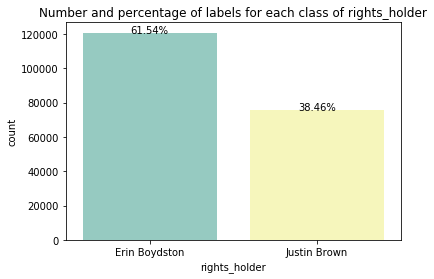

In [0]:
plot_classes('rights_holder', fs=3)

### Rights holder and wild animals class

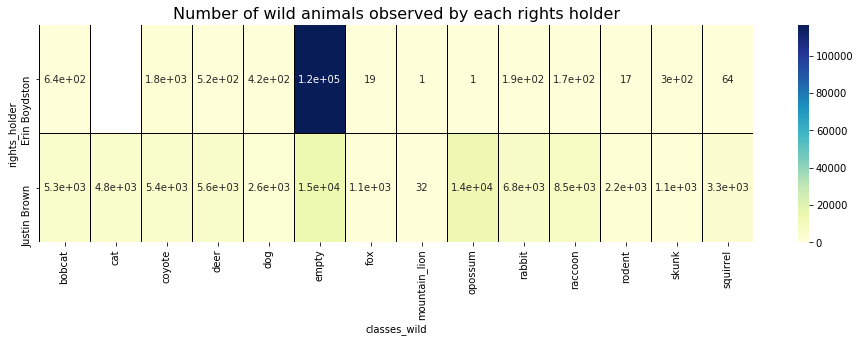

In [0]:
fig, ax = plt.subplots(1,1,figsize=(16,4))
t = pd.DataFrame(train_df.groupby(['classes_wild', 'rights_holder'])['seq_id'].count().reset_index())
m = t.pivot(index='rights_holder', columns='classes_wild', values='seq_id')
s = sns.heatmap(m, linewidths=.1, linecolor='black', annot=True, cmap="YlGnBu")
s.set_title('Number of wild animals observed by each rights holder', size=16)
plt.show()

### Extract date and time information

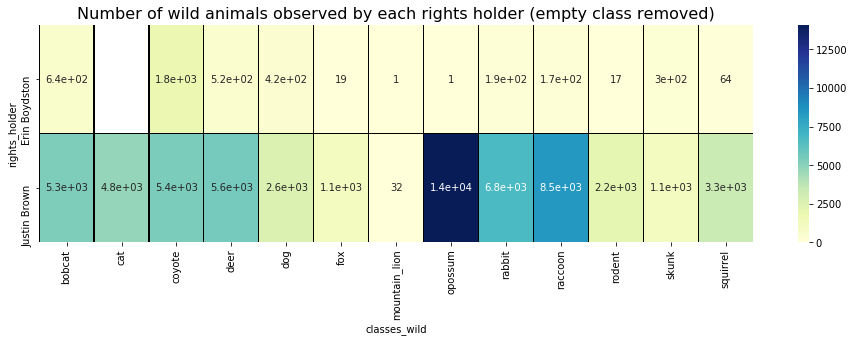

In [0]:
fig, ax = plt.subplots(1,1,figsize=(16,4))
t = pd.DataFrame(train_df[~(train_df.classes_wild == 'empty')].groupby(['classes_wild', 'rights_holder'])['seq_id'].count().reset_index())
m = t.pivot(index='rights_holder', columns='classes_wild', values='seq_id')
s = sns.heatmap(m, linewidths=.1, linecolor='black', annot=True, cmap="YlGnBu")
s.set_title('Number of wild animals observed by each rights holder (empty class removed)', size=16)
plt.show()

In [0]:
try:
    train_df['date_time'] = pd.to_datetime(train_df['date_captured'], errors='coerce')
    train_df["year"] = train_df['date_time'].dt.year
    train_df["month"] = train_df['date_time'].dt.month
    train_df["day"] = train_df['date_time'].dt.day
    train_df["hour"] = train_df['date_time'].dt.hour
    train_df["minute"] = train_df['date_time'].dt.minute
except Exception as ex:
    print("Exception:".format(ex)) 

In [0]:
train_df.head()

category_id        date_captured                                 file_name  \
0           19  2011-05-13 23:43:18  5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg   
1           19  2012-03-17 03:48:44  588a679f-23d2-11e8-a6a3-ec086b02610b.jpg   
2            0  2014-05-11 11:56:46  59279ce3-23d2-11e8-a6a3-ec086b02610b.jpg   
3            0  2013-10-06 02:00:00  5a2af4ab-23d2-11e8-a6a3-ec086b02610b.jpg   
4            0  2011-07-12 13:11:16  599fbd89-23d2-11e8-a6a3-ec086b02610b.jpg   

   frame_num                                    id  location  rights_holder  \
0          1  5998cfa4-23d2-11e8-a6a3-ec086b02610b        33   Justin Brown   
1          2  588a679f-23d2-11e8-a6a3-ec086b02610b       115   Justin Brown   
2          1  59279ce3-23d2-11e8-a6a3-ec086b02610b        96  Erin Boydston   
3          1  5a2af4ab-23d2-11e8-a6a3-ec086b02610b        57  Erin Boydston   
4          3  599fbd89-23d2-11e8-a6a3-ec086b02610b        46   Justin Brown   

                                 seq_id  seq_num_frames  width  height  \
0  6f084ccc-5567-11e8-bc84-dca9047ef277               3   1024     747   
1  6f12067d-5567-11e8-b3c0-dca9047ef277               3   1024     747   
2  6faa92d1-5567-11e8-b1ae-dca9047ef277               1   1024     747   
3  6f7d4702-5567-11e8-9e03-dca9047ef277               1   1024     747   
4  6f1728a1-5567-11e8-9be7-dca9047ef277               3   1024     747   

  classes_wild           date_time    year  month   day  hour  minute  
0      opossum 2011-05-13 23:43:18  2011.0    5.0  13.0  23.0    43.0  
1      opossum 2012-03-17 03:48:44  2012.0    3.0  17.0   3.0    48.0  
2        empty 2014-05-11 11:56:46  2014.0    5.0  11.0  11.0    56.0  
3        empty 2013-10-06 02:00:00  2013.0   10.0   6.0   2.0     0.0  
4        empty 2011-07-12 13:11:16  2011.0    7.0  12.0  13.0    11.0

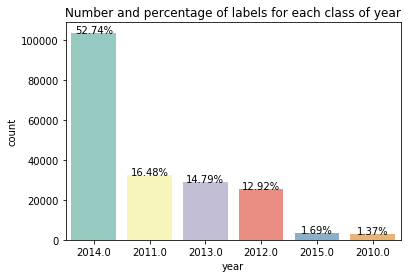

In [0]:
plot_classes('year', fs=3)

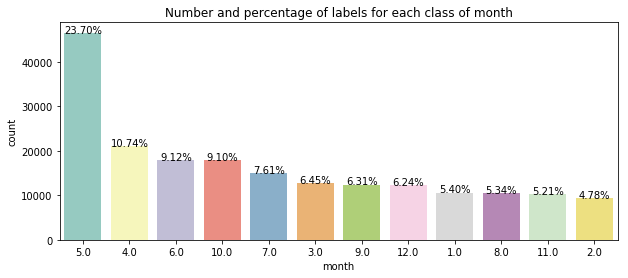

In [0]:
plot_classes('month', fs=5)

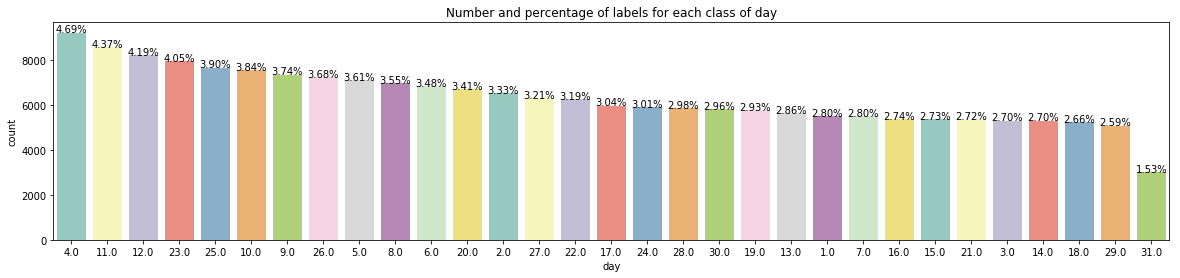

In [0]:
plot_classes('day', fs=10)

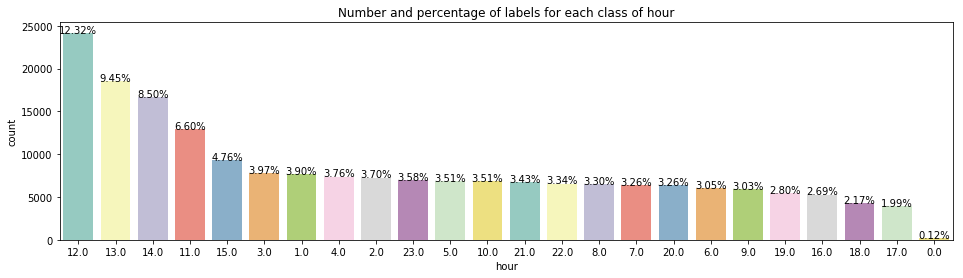

In [0]:
plot_classes('hour', fs=8)

### Classes and hours

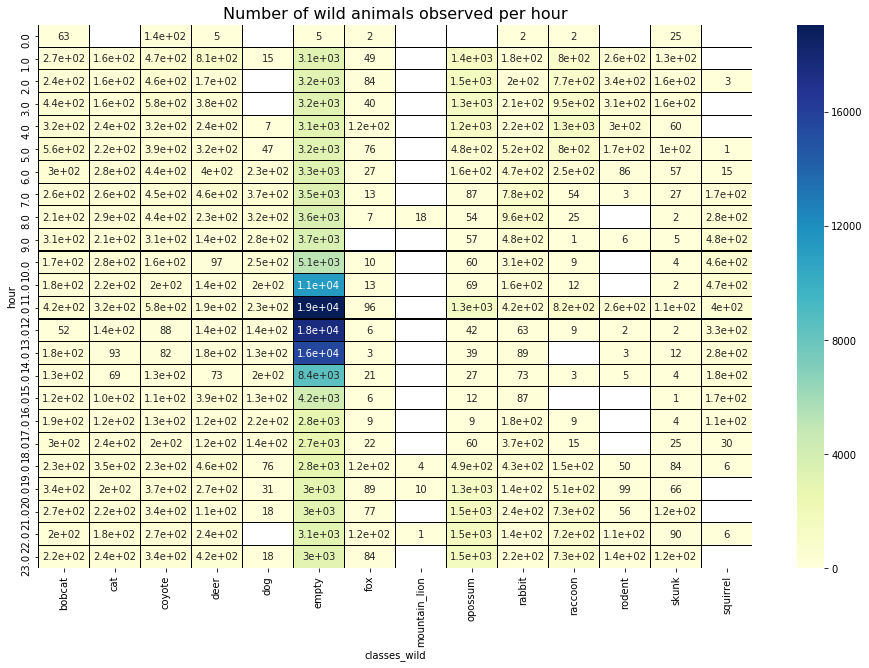

In [0]:
fig, ax = plt.subplots(1,1,figsize=(16,10))
t = pd.DataFrame(train_df.groupby(['classes_wild', 'hour'])['seq_id'].count().reset_index())
m = t.pivot(index='hour', columns='classes_wild', values='seq_id')
s = sns.heatmap(m, linewidths=.1, linecolor='black', annot=True, cmap="YlGnBu")
s.set_title('Number of wild animals observed per hour', size=16)
plt.show()

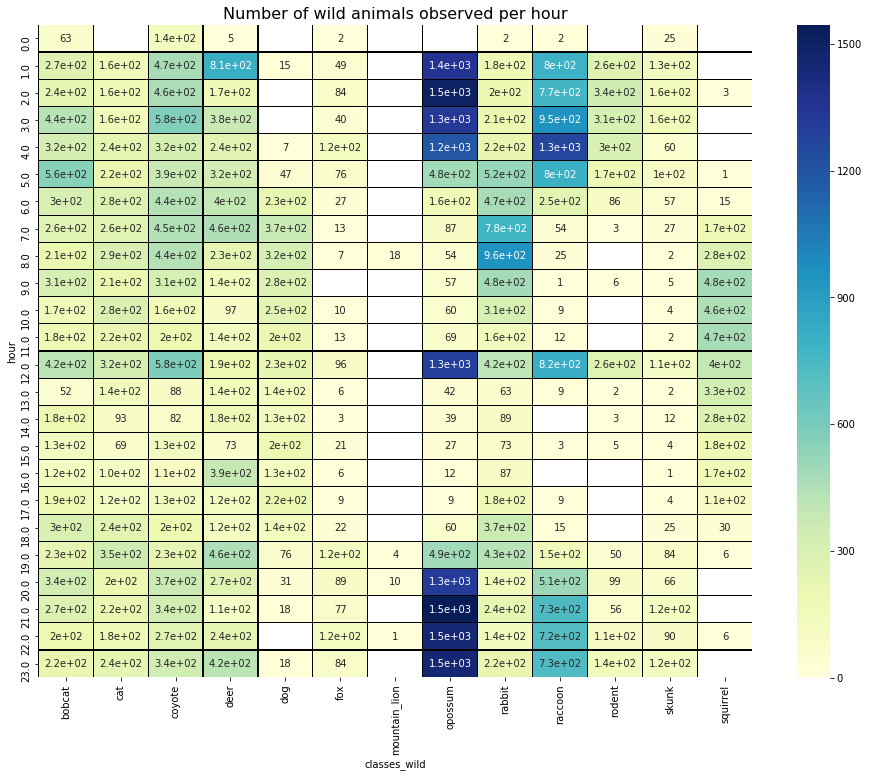

In [0]:
tmp = train_df[train_df['classes_wild'] != 'empty']
fig, ax = plt.subplots(1,1,figsize=(16,12))
t = pd.DataFrame(tmp.groupby(['classes_wild', 'hour'])['seq_id'].count().reset_index())
m = t.pivot(index='hour', columns='classes_wild', values='seq_id')
s = sns.heatmap(m, linewidths=.1, linecolor='black', annot=True, cmap="YlGnBu")
s.set_title('Number of wild animals observed per hour', size=16)
plt.show()

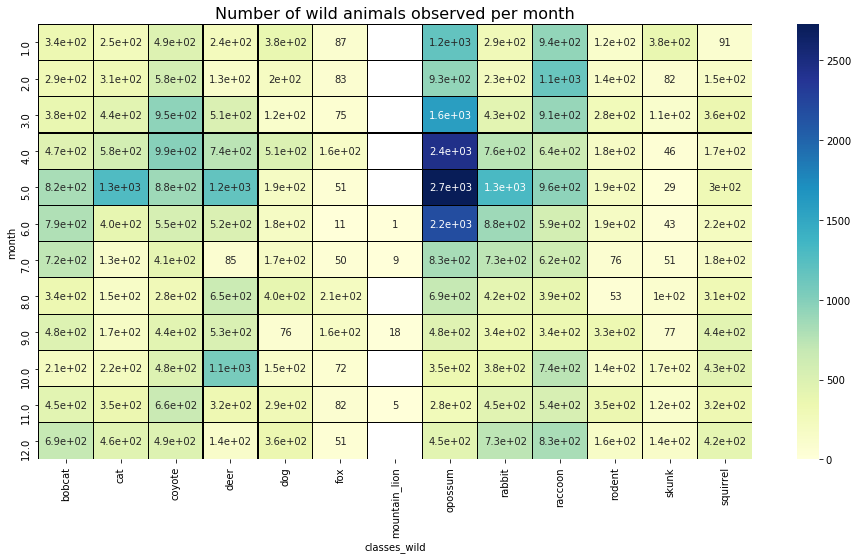

In [0]:
fig, ax = plt.subplots(1,1,figsize=(16,8))
t = pd.DataFrame(tmp.groupby(['classes_wild', 'month'])['seq_id'].count().reset_index())
m = t.pivot(index='month', columns='classes_wild', values='seq_id')
s = sns.heatmap(m, linewidths=.1, linecolor='black', annot=True, cmap="YlGnBu")
s.set_title('Number of wild animals observed per month', size=16)
plt.show()

### Classes per hour and month

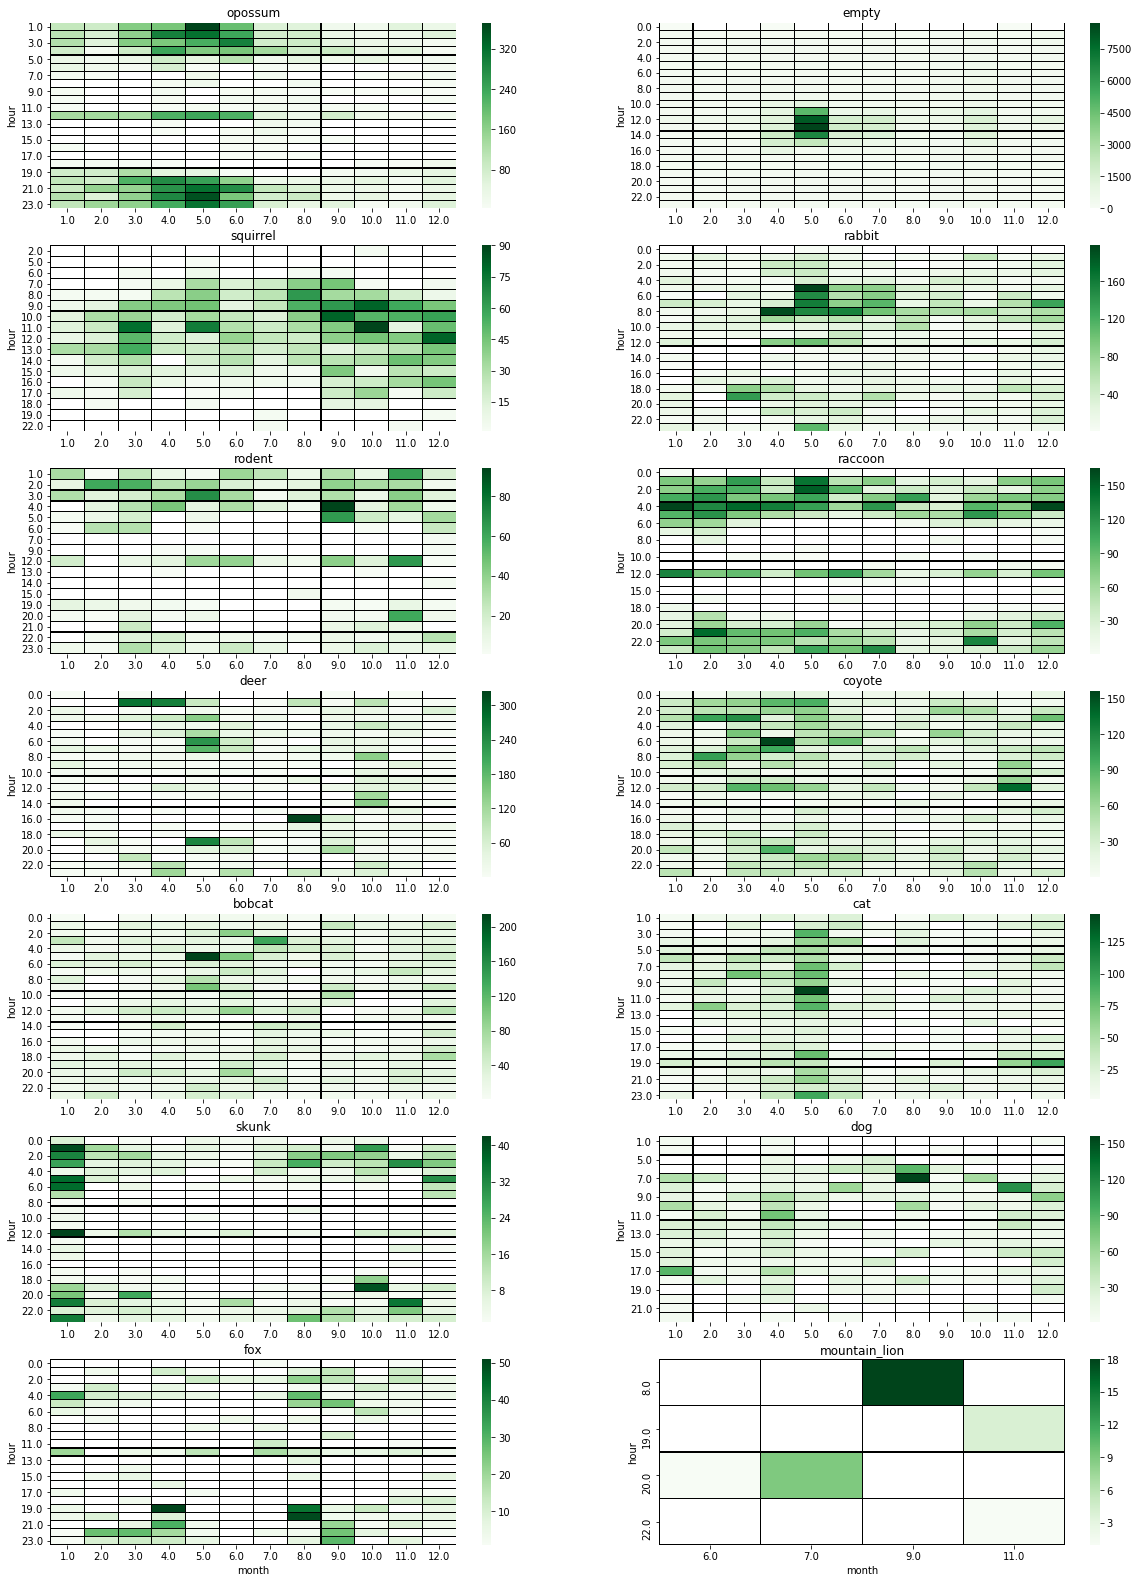

In [0]:
classes = train_df.classes_wild.unique()
fig, ax = plt.subplots(7,2,figsize=(20,28))
i = 0
for class_wild in classes:
    i = i + 1
    plt.subplot(7,2,i)
    tmp = train_df[train_df['classes_wild'] == class_wild]
    t = pd.DataFrame(tmp.groupby(['month', 'hour'])['seq_id'].count().reset_index())
    m = t.pivot(index='hour', columns='month', values='seq_id')
    s = sns.heatmap(m, linewidths=.1, linecolor='black', annot=False, cmap="Greens")
    if(i<13):
        s.set_xlabel('')    
    s.set_title(class_wild, size=12)

plt.show()

### Classes per rights holder and month

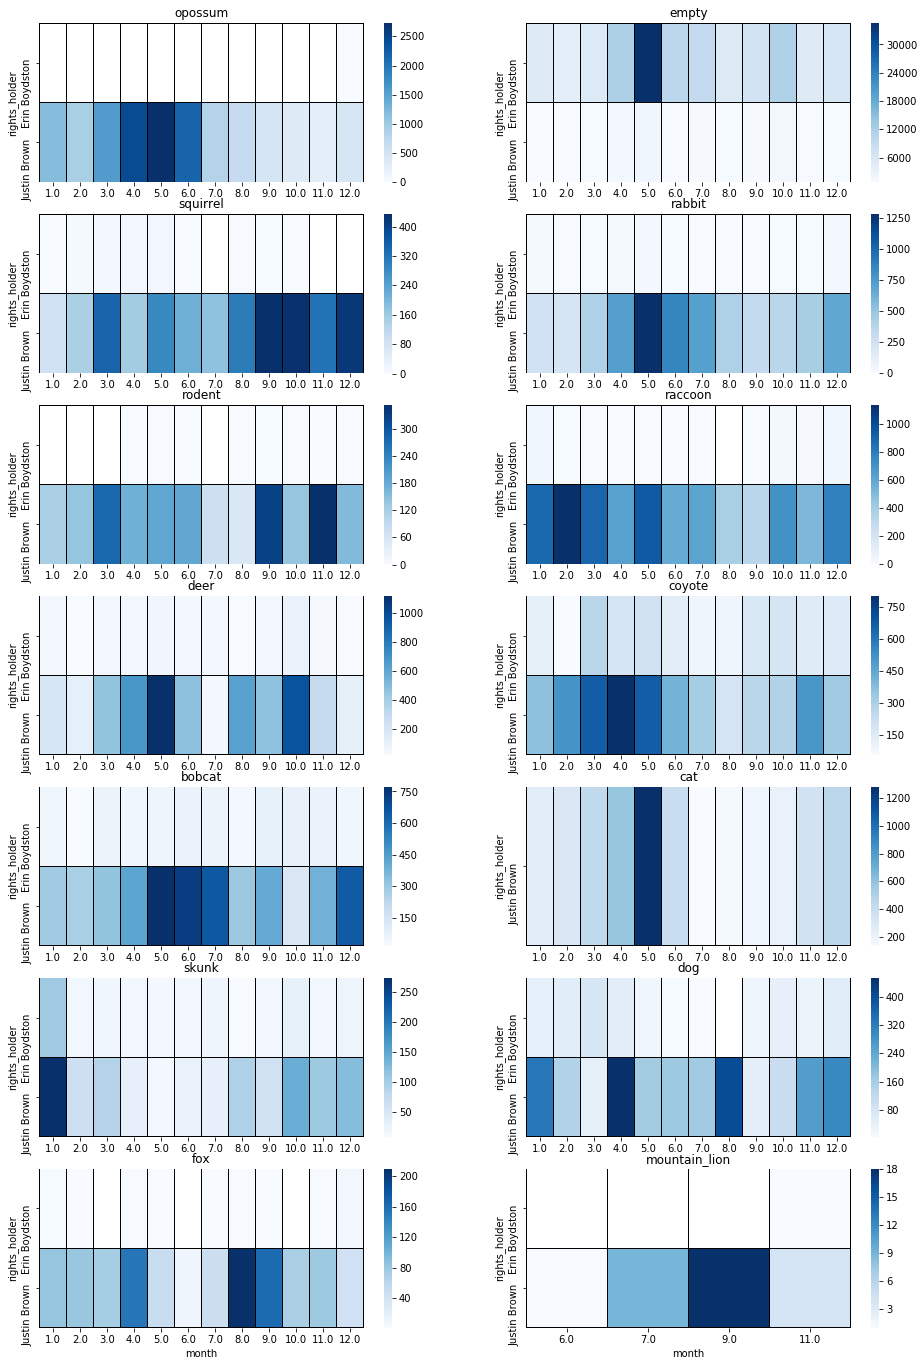

In [0]:
classes = train_df.classes_wild.unique()
fig, ax = plt.subplots(7,2,figsize=(16,24))
i = 0
for class_wild in classes:
    i = i + 1
    plt.subplot(7,2,i)
    tmp = train_df[train_df['classes_wild'] == class_wild]
    t = pd.DataFrame(tmp.groupby(['rights_holder', 'month'])['seq_id'].count().reset_index())
    m = t.pivot(index='rights_holder', columns='month', values='seq_id')
    s = sns.heatmap(m, linewidths=.1, linecolor='black', annot=False, cmap="Blues")
    if(i<13):
        s.set_xlabel('')    
    s.set_title(class_wild, size=12)

plt.show()

### Train images samples

In [0]:
def draw_category_images(var,cols=5):
    categories = (train_df.groupby([var])[var].nunique()).index
    f, ax = plt.subplots(nrows=len(categories),ncols=cols, figsize=(3*cols,3*len(categories)))
    # draw a number of images for each location
    for i, cat in enumerate(categories):
        sample = train_df[train_df[var]==cat].sample(cols)
        for j in range(0,cols):
            file=IMAGE_PATH + sample.iloc[j]['file_name']
            im = Image.open(file)
            ax[i, j].imshow(im, resample=True)
            ax[i, j].set_title(cat, fontsize=9)  
    plt.tight_layout()
    plt.show()

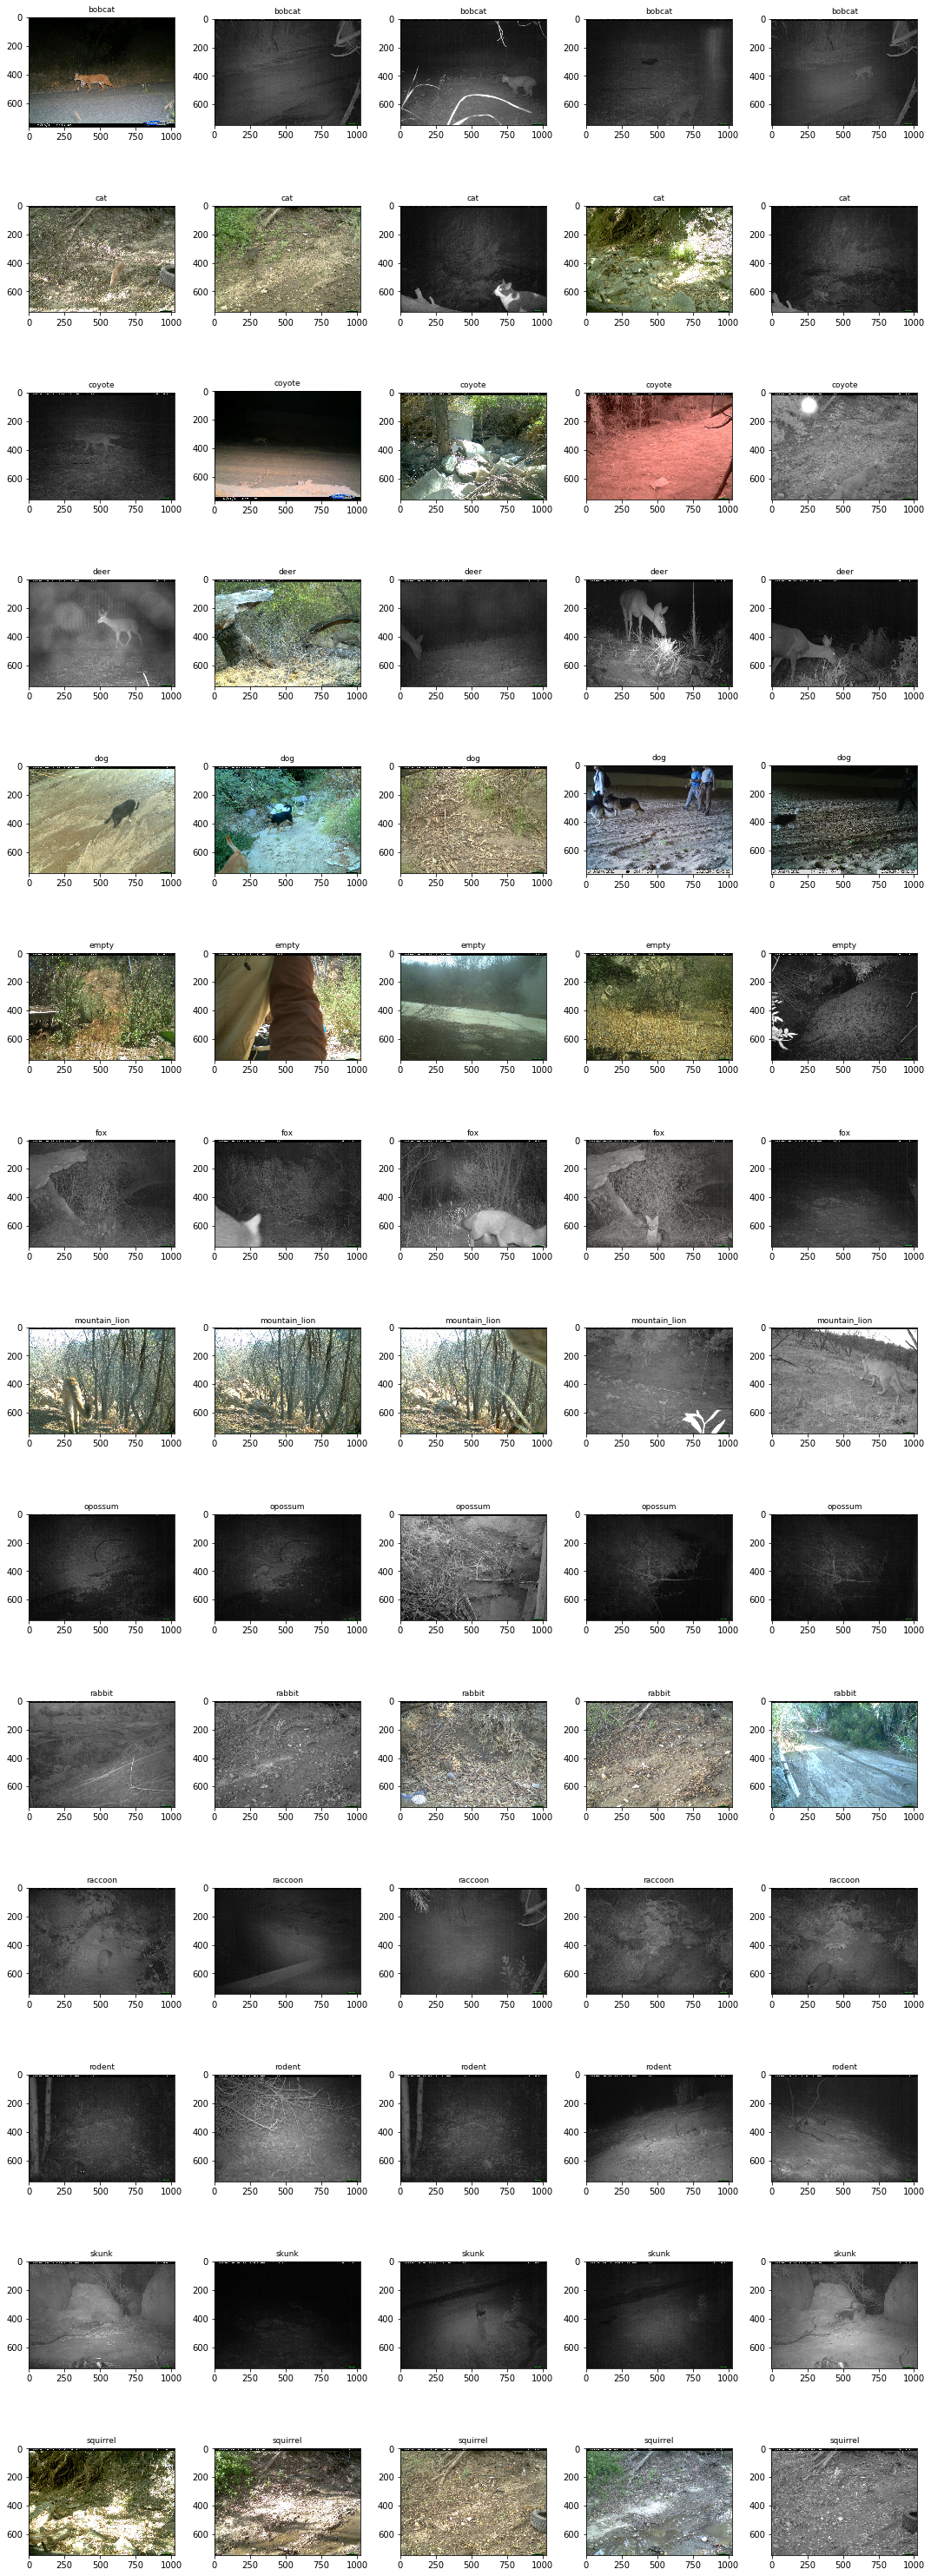

In [0]:
IMAGE_PATH = ('train_images/')
draw_category_images('classes_wild')

### Test images samples

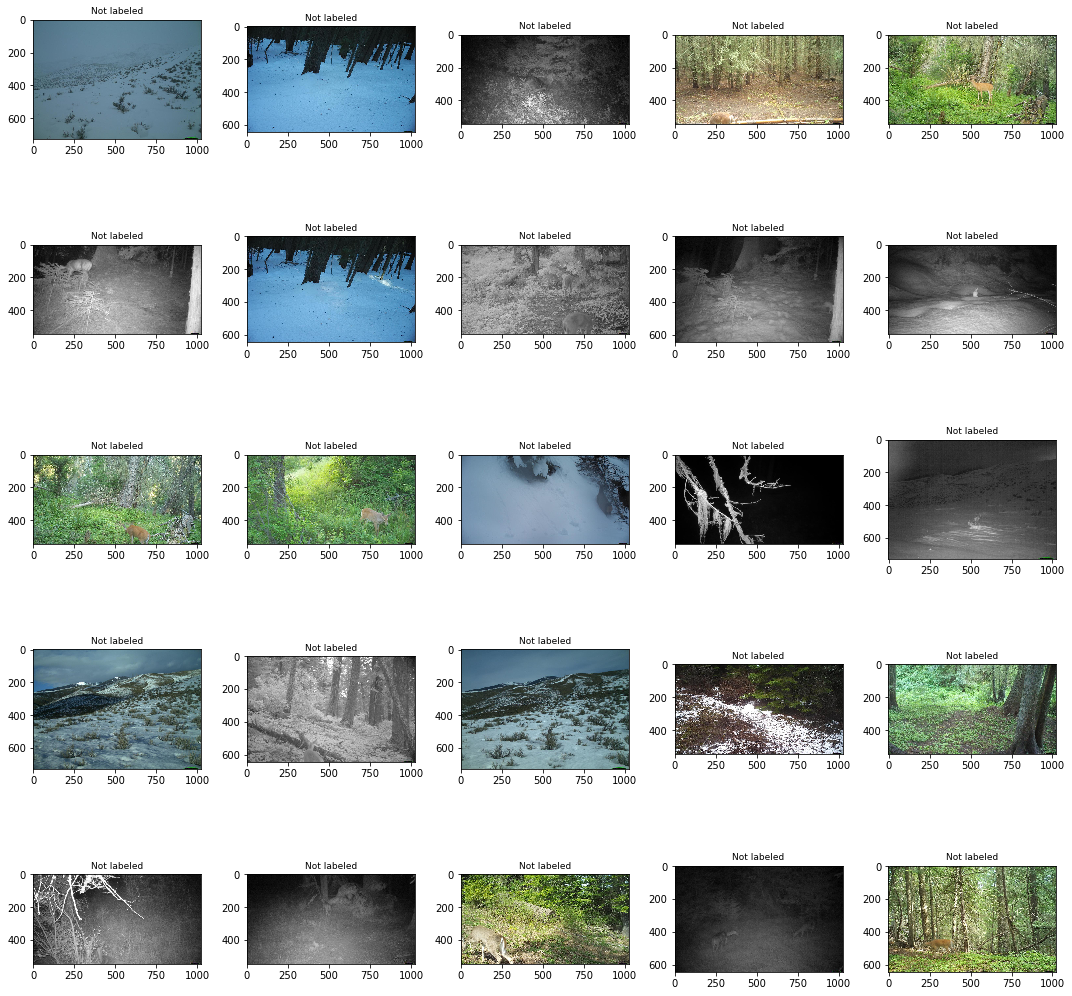

In [0]:
IMAGE_PATH = ('test_images/')
f, ax = plt.subplots(nrows=5,ncols=5, figsize=(15,15))

for i in range(5):
    sample = test_df.sample(5)
    for j in range(5):
        file=IMAGE_PATH + sample.iloc[j]['file_name']
        im = Image.open(file)
        ax[i, j].imshow(im, resample=True)
        ax[i, j].set_title('Not labeled', fontsize=9)  
plt.tight_layout()
plt.show()

# Model

## Data pre-processing for model

### Image Train

In [0]:
SOURCE_IMAGES_TRAIN = os.path.join("train_images/")

images_train = glob(os.path.join(SOURCE_IMAGES_TRAIN, "*.jpg"))

labels_train = pd.read_csv('train/train.csv')

### Images test

In [0]:
SOURCE_IMAGES_TEST = os.path.join("test_images/")

images_test = glob(os.path.join(SOURCE_IMAGES_TEST, "*.jpg"))

labels_test = pd.read_csv('test/test.csv')

In [0]:
# Affiche les 5 premières images de train du tableau 
images_train[0:5]

['train_images/590ebc52-23d2-11e8-a6a3-ec086b02610b.jpg',
 'train_images/58910e04-23d2-11e8-a6a3-ec086b02610b.jpg',
 'train_images/5946bac2-23d2-11e8-a6a3-ec086b02610b.jpg',
 'train_images/59104b74-23d2-11e8-a6a3-ec086b02610b.jpg',
 'train_images/58f73d41-23d2-11e8-a6a3-ec086b02610b.jpg']

In [0]:
# Affiche les 5 premières images de test du tableau 
images_test[0:5]

['test_images/dc6a0e62-2c04-11e9-bcad-06f10d5896c4.jpg',
 'test_images/1e841687-2bf7-11e9-bcad-06f10d5896c4.jpg',
 'test_images/5fd83b72-2c1e-11e9-bcad-06f10d5896c4.jpg',
 'test_images/9f56c39e-2c1f-11e9-bcad-06f10d5896c4.jpg',
 'test_images/bdbae642-2c09-11e9-bcad-06f10d5896c4.jpg']

### Show three random images

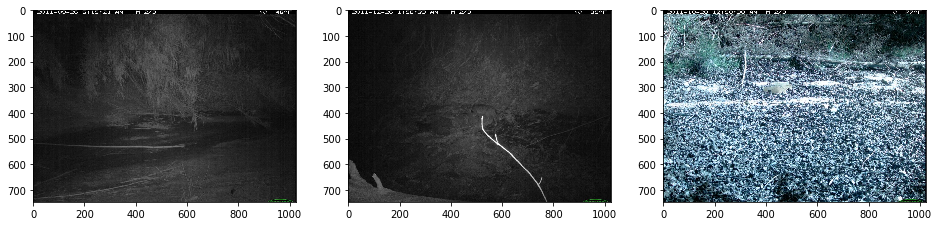

In [0]:
r = random.sample(images_train, 3)
r

# Matplotlib black magic
plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(cv2.imread(r[0]))

plt.subplot(132)
plt.imshow(cv2.imread(r[1]))

plt.subplot(133)
plt.imshow(cv2.imread(r[2]));   

In [0]:
labels_train

category_id        date_captured  \
0                19  2011-05-13 23:43:18   
1                19  2012-03-17 03:48:44   
2                 0  2014-05-11 11:56:46   
3                 0  2013-10-06 02:00:00   
4                 0  2011-07-12 13:11:16   
5                 3  2011-06-28 15:29:42   
6                 8  2012-01-05 07:41:39   
7                 0  2014-07-31 14:00:00   
8                 0  2014-02-14 04:00:00   
9                 0  2013-12-11 06:00:00   
10                0  2014-07-01 15:07:28   
11                0  2013-10-05 15:51:15   
12                4  2014-09-28 01:00:53   
13               13  2012-02-23 08:38:09   
14               19  2012-05-07 23:17:19   
15               19  2010-06-04 01:32:16   
16                0  2014-07-28 08:00:00   
17               13  2010-05-31 23:24:28   
18                1  2015-03-25 01:16:24   
19               11  2013-02-09 10:47:54   
20                0  2014-04-21 15:05:29   
21               19  2010-10-07 20:14:32   
22                0  2013-10-13 23:00:00   
23               13  2012-03-28 22:01:01   
24                0  2014-05-16 14:32:50   
25                0  2014-08-17 11:00:00   
26                8  2011-09-18 08:13:43   
27                0  2013-11-07 20:00:00   
28                0  2014-01-08 09:00:00   
29                0  2014-06-03 13:49:30   
...             ...                  ...   
196269            0  2014-02-08 07:00:00   
196270            0  2011-05-10 15:02:25   
196271           18  2011-11-27 23:41:05   
196272            0  2014-10-05 08:00:00   
196273            0  2014-06-24 06:00:00   
196274            0  2014-03-04 17:00:00   
196275            0  2014-02-04 09:00:00   
196276            0  2014-04-21 14:09:49   
196277            8  2011-07-22 15:08:14   
196278            0  2014-05-09 15:01:27   
196279            0  2014-01-01 18:00:00   
196280            8  2011-07-28 06:51:17   
196281            0  2014-07-25 07:00:00   
196282            0  2014-04-25 14:49:07   
196283            0  2014-05-13 22:00:00   
196284            0  2014-05-25 14:15:43   
196285           13  2011-08-14 02:35:26   
196286            0  2014-06-15 04:00:00   
196287            0  2014-10-11 07:19:34   
196288            0  2014-07-14 13:00:00   
196289           19  2012-03-21 21:36:48   
196290            0  2014-05-01 12:37:33   
196291            8  2012-05-16 07:12:20   
196292            0  2014-03-31 12:00:00   
196293           13  2011-07-21 04:06:58   
196294            0  2013-10-04 12:33:13   
196295            0  2014-02-16 04:00:00   
196296            4  2011-11-25 03:10:50   
196297            0  2014-03-27 05:00:00   
196298            0  2014-05-23 12:18:36   

                                       file_name  frame_num  \
0       5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg          1   
1       588a679f-23d2-11e8-a6a3-ec086b02610b.jpg          2   
2       59279ce3-23d2-11e8-a6a3-ec086b02610b.jpg          1   
3       5a2af4ab-23d2-11e8-a6a3-ec086b02610b.jpg          1   
4       599fbd89-23d2-11e8-a6a3-ec086b02610b.jpg          3   
5       593d68d7-23d2-11e8-a6a3-ec086b02610b.jpg          3   
6       59fae563-23d2-11e8-a6a3-ec086b02610b.jpg          3   
7       58782b45-23d2-11e8-a6a3-ec086b02610b.jpg          1   
8       5911d8fd-23d2-11e8-a6a3-ec086b02610b.jpg          1   
9       59292e5e-23d2-11e8-a6a3-ec086b02610b.jpg          1   
10      58b13139-23d2-11e8-a6a3-ec086b02610b.jpg          1   
11      59c806c2-23d2-11e8-a6a3-ec086b02610b.jpg          1   
12      595f7b9c-23d2-11e8-a6a3-ec086b02610b.jpg          2   
13      58adc33d-23d2-11e8-a6a3-ec086b02610b.jpg          3   
14      5883e97b-23d2-11e8-a6a3-ec086b02610b.jpg          1   
15      58d47cf1-23d2-11e8-a6a3-ec086b02610b.jpg          4   
16      5a096958-23d2-11e8-a6a3-ec086b02610b.jpg          1   
17      588a66f6-23d2-11e8-a6a3-ec086b02610b.jpg          1   
18      59adfdd1-23d2-11e8-a6a3-ec086b02610b.jpg          2   
19      59bac8fe-23

category_id        date_captured  \
152910            0  2014-04-30 10:38:58   

                                       file_name  frame_num  \
152910  590ebc52-23d2-11e8-a6a3-ec086b02610b.jpg          1   

                                          id  location  rights_holder  \
152910  590ebc52-23d2-11e8-a6a3-ec086b02610b       106  Erin Boydston   

                                      seq_id  seq_num_frames  width  height  
152910  6f7326dc-5567-11e8-8191-dca9047ef277               1   1024     747

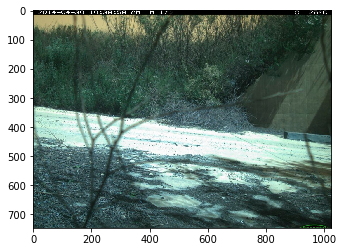

In [0]:
# Example of bad x-ray and good reason to use data augmentation
e = cv2.imread(os.path.join(SOURCE_IMAGES_TRAIN,'590ebc52-23d2-11e8-a6a3-ec086b02610b.jpg'))

plt.imshow(e)
 
labels_train[labels_train["file_name"] == '590ebc52-23d2-11e8-a6a3-ec086b02610b.jpg']

In [0]:
590ebc52-23d2-11e8-a6a3-ec086b02610b.jpg

### Turn images into arrays and make a list of classes

In [0]:
def proc_images(images,WIDTH,HEIGHT,labels,index_name):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """
    
    disease="Infiltration"

    x = [] # images as arrays
    y = [] # labels Infiltration or Not_infiltration
  

    for img in images:
        base = os.path.basename(img)
        finding = labels["Finding Labels"][labels[index_name] == base].values[0]

        # Read and resize image
        full_size_image = cv2.imread(img)
        x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))

        # Labels
        if disease in finding:
            #finding = str(disease)
            finding = 1
            y.append(finding)

        else:
            #finding = "Not_" + str(disease)
            finding = 0
            y.append(finding)

    return x_train,y_train

In [0]:
WIDTH = 128
HEIGHT = 128
index_name = "file_name"

In [0]:
x,y = proc_images(WIDTH,HEIGHT,labels_train,index_name)

## Scale the images

In [0]:
£x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.